In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
sys.path.append(os.getcwd()+'/src/')
%load_ext autoreload
%autoreload 2
from utils import *


plt.style.use('seaborn-deep')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
BASE_PATH = '../initial_model'

In [70]:
BASE_PATH='./output_malota'

In [262]:
models = {
    # 'DQN_MlpPolicy': np.load(f'{BASE_PATH}/dqn/MlpPolicy/observations.npy'),
    # 'DQN_CnnPolicy': np.load(f'{BASE_PATH}/dqn/CnnPolicy/observations.npy'),

    #'PPO_MlpPolicy': np.load(r'C:\initial_model\ppo\MlpPolicy\observations_ppo_MlpPolicy_1.npy'),
    #'PPO_masked': np.load(r'C:\initial_model\historic_3\pca_masked_PPO_67\observations_ppo_MlpPolicy_1.npy'),
    'PPO_masked_3_features': np.load(r'C:\initial_model\historic_3\ppo_masked_PPO_70\TEST-DNNEVO-2\observations_ppo_MlpPolicy_1.npy'),
    'PPO_2_najmniej_wazne_cechy': np.load(r'C:\initial_model\historic_3\ppo_masked_PPO_73_worst_features\TEST-DNNEVO\observations_ppo_MlpPolicy_1.npy'),
    'gAWRL': np.load(r'C:\initial_model\historic_3\gawrl_old_PPO_1\observations_attention_MlpPolicy_1.npy', allow_pickle=True),
    'gAWRL_mala_architektura': np.load(r'C:\initial_model\historic_3\gawrl_old_PPO_4\observations_attention_MlpPolicy_1.npy', allow_pickle=True),
    
    #'Attention': np.load(r'C:\initial_model\attention\MlpPolicy\observations.npy'),
    #'PCA': np.load(r'C:\initial_model\pca\MlpPolicy\observations.npy'),
    #'PCA_offline': np.load(r'C:\initial_model\ppo\MlpPolicy\observations_pca_MlpPolicy_1.npy'),
    'SPCA': np.load(r'C:\initial_model\historic_3\spca_PPO_64\observations_pca_MlpPolicy_1.npy'),
    #'Attention': np.load(r'C:\initial_model\attention\MlpPolicy\observations.npy'),
    #'Attention': np.load(r'C:\initial_model\historic_3\attention_PPO_60_400_000_20_20_vms\observations_attention_MlpPolicy_1.npy', allow_pickle=True),
    'Attention': np.load(r'C:\initial_model\historic_3\attention_PPO_63_100_000_20_20_vms_arch_64\attention\MlpPolicy\observations_attention_MlpPolicy_1.npy', allow_pickle=True),
    'Attention Transformer': np.load(r'C:\initial_model\historic_3\attention_PPO_65\observations.npy', allow_pickle=True),

    #'Attention': np.load(r'C:\initial_model\ppo\MlpPolicy\observations_attention_MlpPolicy_1.npy', allow_pickle=True),
    
    #'RecurrentPPO_MlpLstmPolicy': np.load(r'C:\initial_model\ppo\MlpPolicy\observations_recurrentPPO_MlpLstmPolicy_1.npy'),
    'RecurrentPPO_MlpLstmPolicy': np.load(r'C:\initial_model\ppo\MlpPolicy\observations_recurrentPPO_MlpLstmPolicy_1.npy'),
    # 'PPO_CnnPolicy': np.load(f'{BASE_PATH}/ppo/CnnPolicy/observations.npy'),
    #'RecurrentPPO_MlpLstmPolicy': np.load(r'C:\initial_model\recurrentppo\MlpLstmPolicy\observations.npy'),
    # 'RecurrentPPO_CnnLstmPolicy': np.load(f'{BASE_PATH}/recurrentppo/CnnLstmPolicy/observations.npy'),
}

In [263]:
models['gAWRL'].shape

(2410, 1, 7)

In [264]:

def preprocess_cnn_observations(X):
    X = X[:, :, :, :1, :]
    X = np.squeeze(X, axis=1)
    X = np.squeeze(X, axis=1)
    X = np.squeeze(X, axis=1)
    df = pd.DataFrame(X, columns = Utils.FEATURE_NAMES)
    return df

def preprocess_mlp_observations(X):
    try:
        X = np.squeeze(X, axis=1)
    except Exception as e:
        print(e)
    df = pd.DataFrame(X, columns = Utils.FEATURE_NAMES)
    return df

def preprocess_transformers_observation(X):
    
    if getattr(X, 'dtype', None) == object:                       
        H = np.stack([np.asarray(d['h']) for d in X])
        return (H[:, 0, :].astype(np.float32) if H.ndim == 3 else H.astype(np.float32))
    X = np.asarray(X)
    if X.ndim == 5: X = X.squeeze((1, 2))[:, -1, :]              
    if X.ndim == 3 and X.shape[1] == 1: X = X[:, 0, :]  
    df = pd.DataFrame(X, columns = Utils.FEATURE_NAMES)        
    
    return df

In [266]:
for model, observations in models.items():
    if 'Cnn' in model:
    #or 'Attention' in model:
        models[model] = preprocess_cnn_observations(observations)
    elif 'Attention' in model:
        models[model] = preprocess_transformers_observation(observations)
    elif model=='PCA_offline':
        #observations = np.squeeze(observations, axis=1)
        #print(observations.shape)
        models[model] = pd.DataFrame(observations, columns = Utils.FEATURE_NAMES)  
    else:
        print(model)
        models[model] = preprocess_mlp_observations(observations)

PPO_masked_3_features
PPO_2_najmniej_wazne_cechy
gAWRL
gAWRL_mala_architektura
SPCA
RecurrentPPO_MlpLstmPolicy


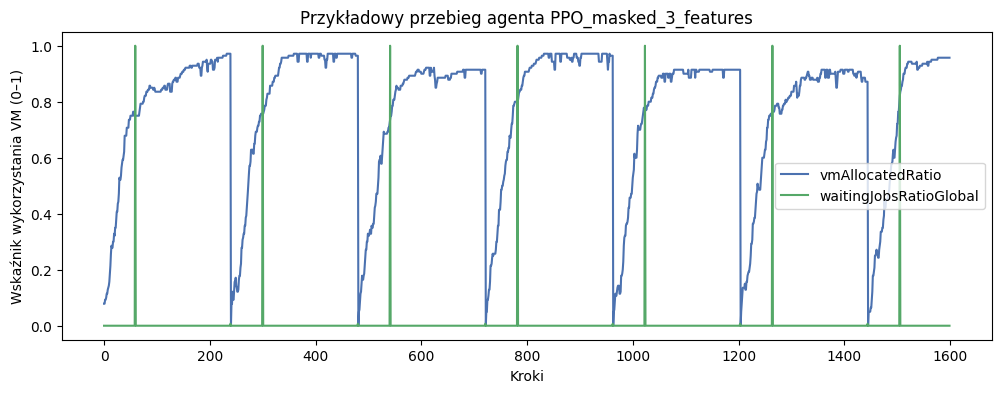

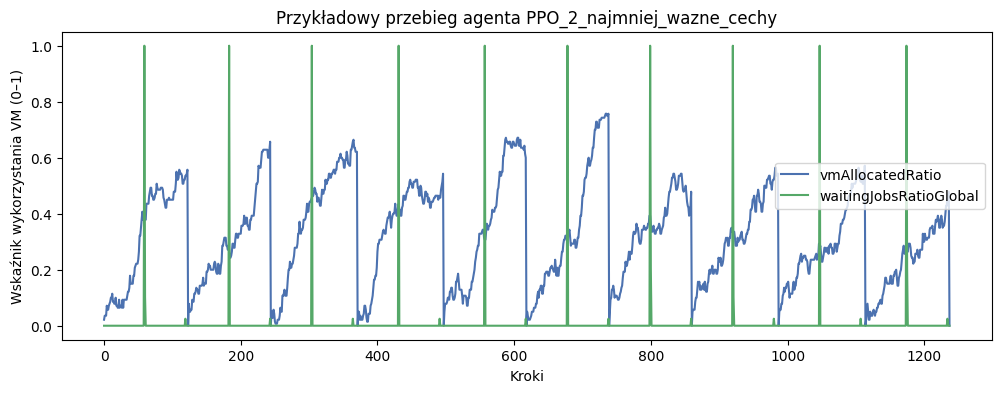

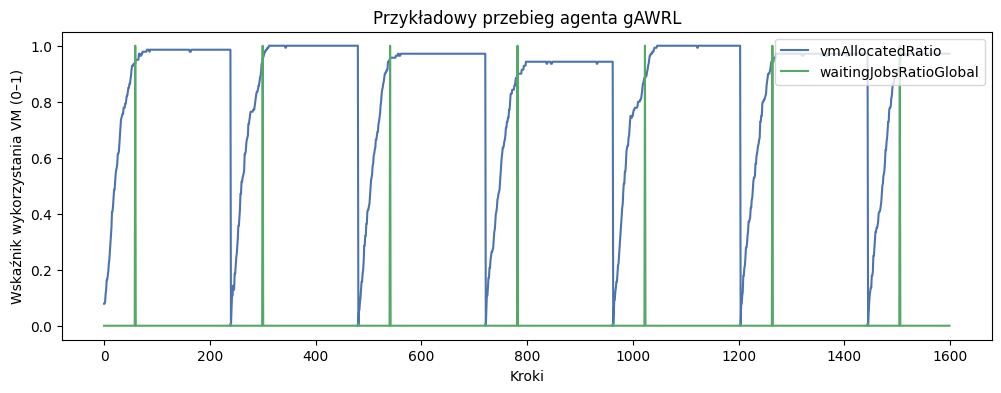

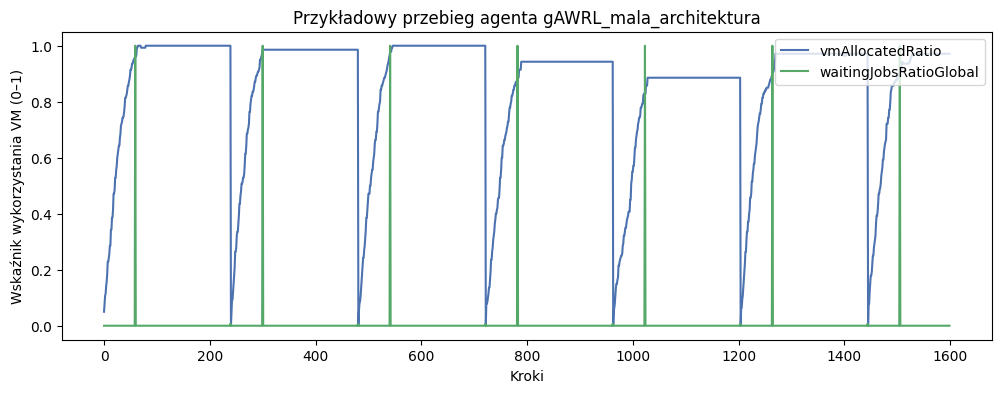

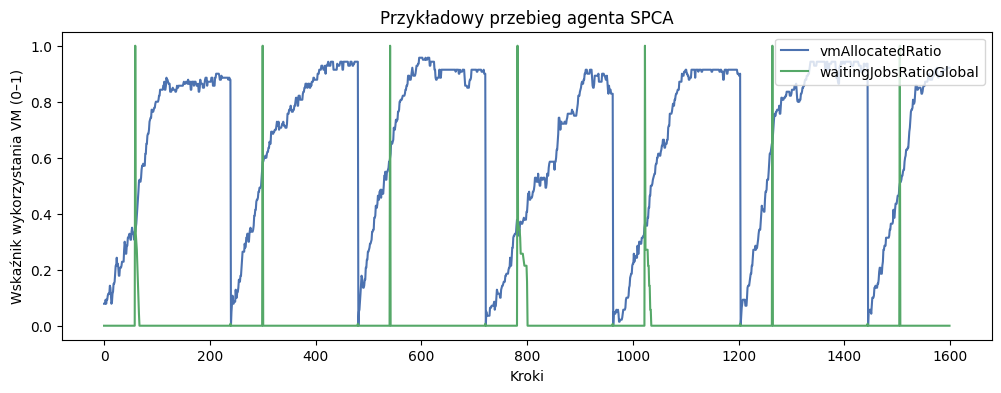

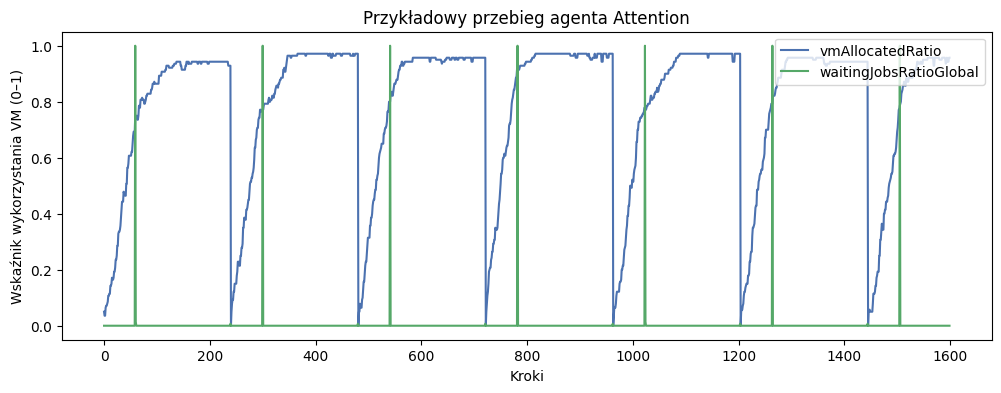

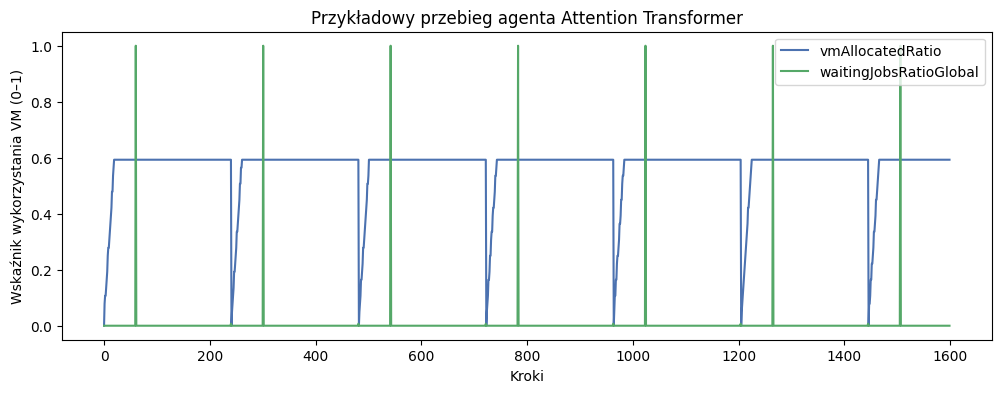

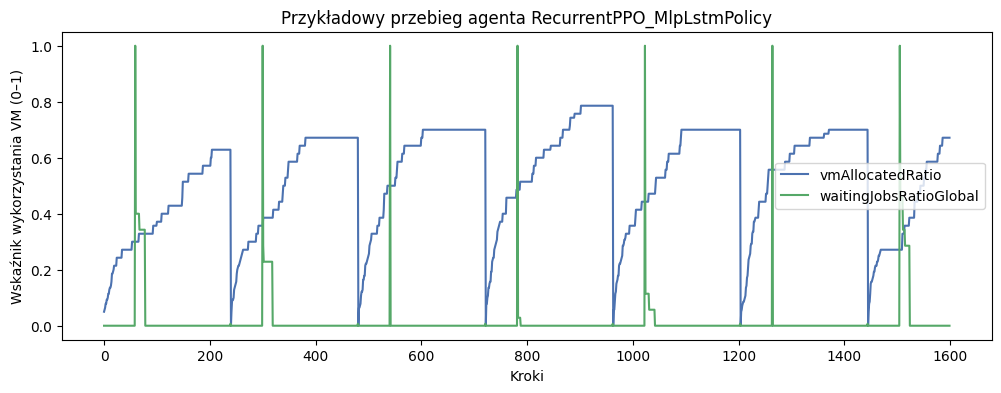

In [267]:
for model, df in models.items():
    N_steps = 1600
    columns = [
        "vmAllocatedRatio",
        "waitingJobsRatioGlobal",
         #"avgCPUUtilization"
        ]

    fig = plt.figure(figsize=(12, 4))
    plt.xlabel("Kroki")
    plt.ylabel("Wskaźnik wykorzystania VM (0–1)")
    plt.plot(df[columns][:N_steps])
    plt.title(f'Przykładowy przebieg agenta {model}')
    if 'PPO' in model:
        plt.legend(columns, loc='center right')
    else:
        plt.legend(columns, loc='upper right')
    plt.show()

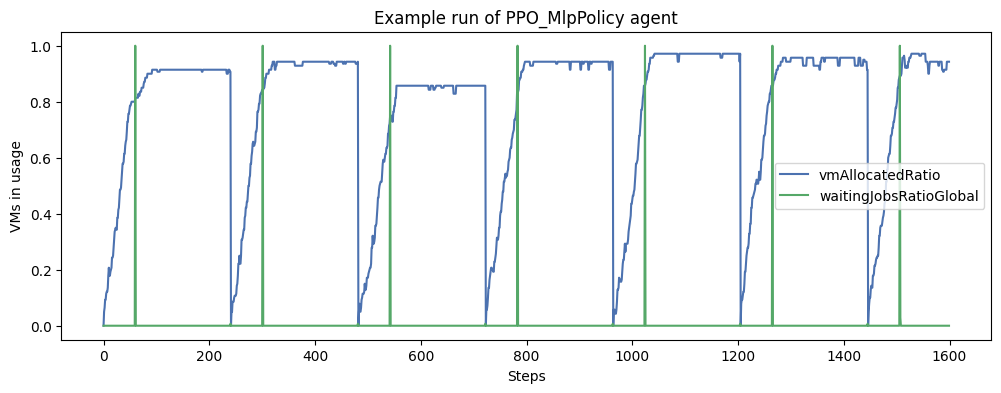

In [16]:
# NEW

for model, df in models.items():
    N_steps = 1600
    columns = [
        "vmAllocatedRatio",
        "waitingJobsRatioGlobal"
        ]

    fig = plt.figure(figsize=(12, 4))
    plt.xlabel("Steps")
    plt.ylabel("VMs in usage")
    plt.plot(df[columns][:N_steps])
    plt.title(f'Example run of {model} agent')
    if 'PPO' in model:
        plt.legend(columns, loc='center right')
    else:
        plt.legend(columns, loc='upper right')
    plt.show()

Tak wygląda polityka jak ją uczę na przyspieszeniu symulatora = 1000

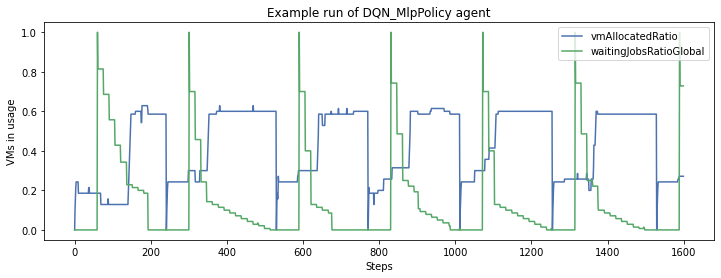

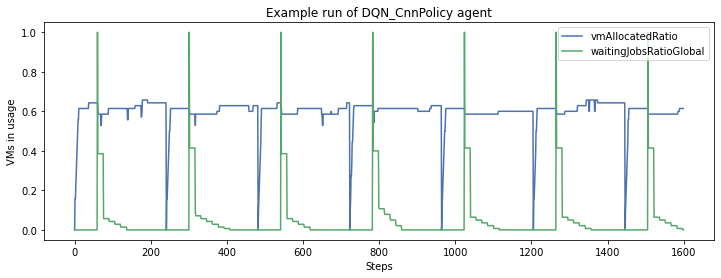

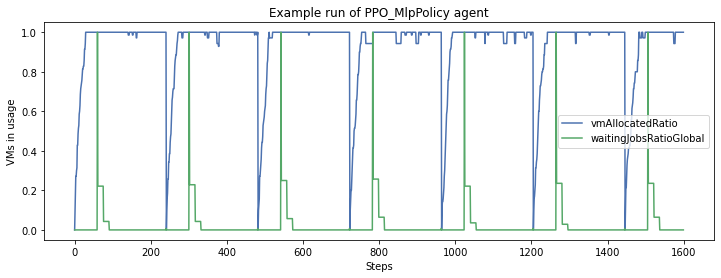

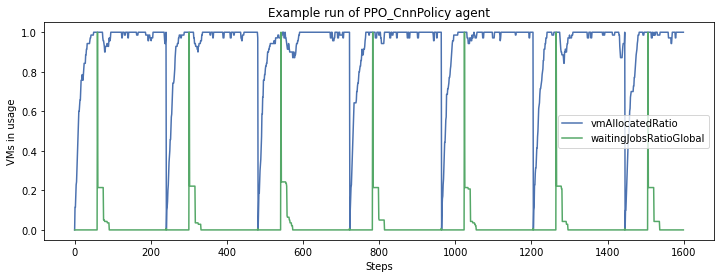

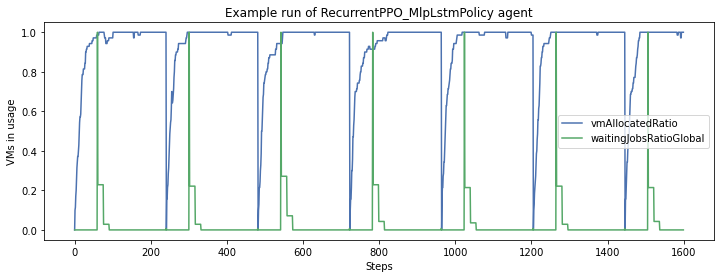

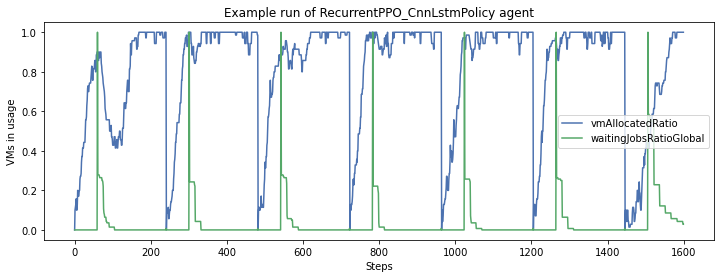

In [24]:
for model, df in models.items():
    N_steps = 1600
    columns = [
        "vmAllocatedRatio",
        "waitingJobsRatioGlobal"
        ]

    fig = plt.figure(figsize=(12, 4))
    plt.xlabel("Steps")
    plt.ylabel("VMs in usage")
    plt.plot(df[columns][:N_steps])
    plt.title(f'Example run of {model} agent')
    if 'PPO' in model:
        plt.legend(columns, loc='center right')
    else:
        plt.legend(columns, loc='upper right')
    plt.show()

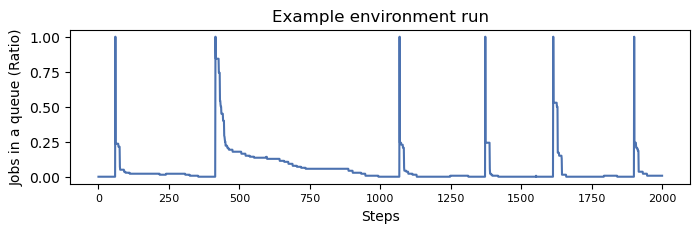

In [55]:
N_steps_start = 0
N_steps_stop = 2000
from matplotlib.ticker import MaxNLocator
plt.style.use('seaborn-deep')

columns = Utils.FEATURE_NAMES
columns = [
    # "vmAllocatedRatioHistory",
    # "avgCPUUtilizationHistory",
    # "p90CPUUtilizationHistory",
    # "avgMemoryUtilizationHistory",
    # "p90MemoryUtilizationHistory",
    "waitingJobsRatioGlobalHistory",
    # "waitingJobsRatioRecentHistory"
    ]
# columns = ['vmAllocatedRatioHistory', 'avgCPUUtilizationHistory', 'waitingJobsRatioGlobalHistory']
fig, host = plt.subplots(figsize=(8,2))

host.set_xlabel("Steps")
host.set_ylabel("Jobs in a queue (Ratio)")
# par1 = host.twinx()
# par2 = host.twinx()
# host.set_xlabel("Steps")
# par1.set_ylabel("vmAllocatedRatioHistory")
# # par2.set_ylabel('avgCPUUtilizationHistory')
# host.set_ylabel("waitingJobsRatioGlobalHistory")
plt.plot(df[columns][N_steps_start:N_steps_stop])
plt.xticks(fontsize=8)
ax = fig.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.legend(columns)
plt.title('Example environment run')
plt.show()


In [6]:
# MLP POLICY

X = np.load(f'{BASE_PATH}/ppo/MlpPolicy/observations.npy')

# X = np.load(f'{BASE_PATH}/recurrentppo/MlpLstmPolicy/observations.npy')

# X = np.load(f'{BASE_PATH}/dqn/MlpPolicy/observations.npy')

X = np.squeeze(X, axis=1)
df = pd.DataFrame(X, columns = Utils.FEATURE_NAMES)

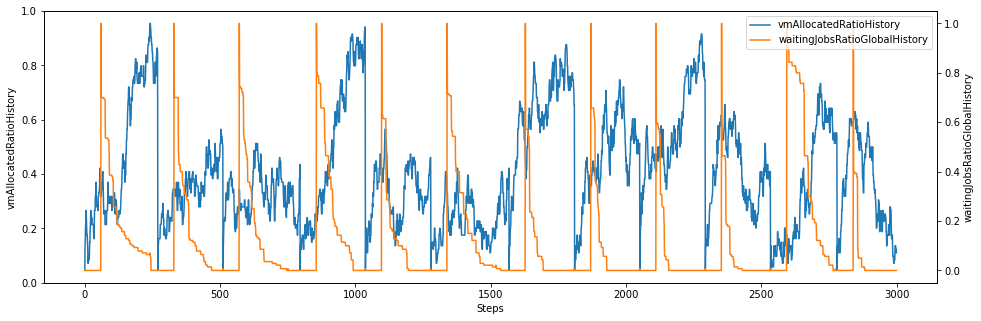

In [7]:
N_steps = 3000
fig, host = plt.subplots(figsize=(16,5))
par1 = host.twinx()
host.set_xlabel("Steps")
host.set_ylabel("vmAllocatedRatioHistory")
par1.set_ylabel("waitingJobsRatioGlobalHistory")
plt.plot(df[['vmAllocatedRatioHistory', 'waitingJobsRatioGlobalHistory']][:N_steps])

plt.legend(['vmAllocatedRatioHistory', 'waitingJobsRatioGlobalHistory'])
plt.show()

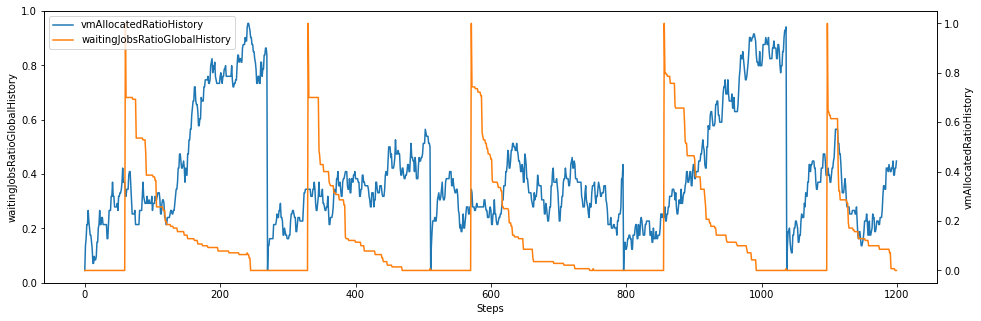

In [8]:
N_steps = 1200
fig, host = plt.subplots(figsize=(16,5))
par1 = host.twinx()
host.set_xlabel("Steps")
par1.set_ylabel("vmAllocatedRatioHistory")
host.set_ylabel("waitingJobsRatioGlobalHistory")
plt.plot(df[['vmAllocatedRatioHistory', 'waitingJobsRatioGlobalHistory']][:N_steps])

plt.legend(['vmAllocatedRatioHistory', 'waitingJobsRatioGlobalHistory'])
plt.show()

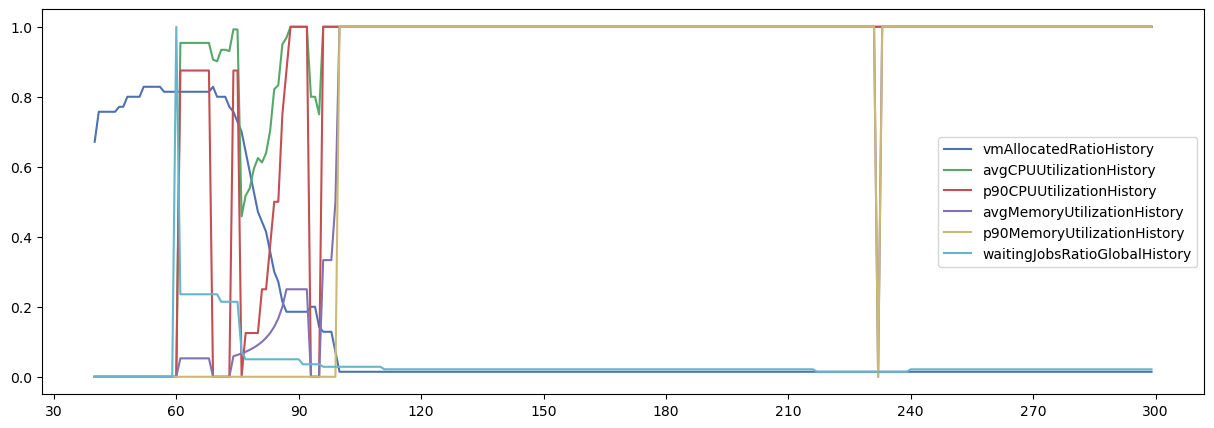

In [42]:
N_steps_start = 40
N_steps_stop = 300
from matplotlib.ticker import MaxNLocator

columns = Utils.FEATURE_NAMES
columns = [
    "vmAllocatedRatioHistory",
    "avgCPUUtilizationHistory",
    "p90CPUUtilizationHistory",
    "avgMemoryUtilizationHistory",
    "p90MemoryUtilizationHistory",
    "waitingJobsRatioGlobalHistory",
    # "waitingJobsRatioRecentHistory"
    ]
# columns = ['vmAllocatedRatioHistory', 'avgCPUUtilizationHistory', 'waitingJobsRatioGlobalHistory']
fig, host = plt.subplots(figsize=(15,5))
# par1 = host.twinx()
# par2 = host.twinx()
# host.set_xlabel("Steps")
# par1.set_ylabel("vmAllocatedRatioHistory")
# # par2.set_ylabel('avgCPUUtilizationHistory')
# host.set_ylabel("waitingJobsRatioGlobalHistory")
plt.plot(df[columns][N_steps_start:N_steps_stop])
ax = fig.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(columns)
plt.show()

In [10]:
df[['vmAllocatedRatioHistory', 'waitingJobsRatioGlobalHistory']]

,vmAllocatedRatioHistory,waitingJobsRatioGlobalHistory
0,0.000000,0.000000
1,0.100000,0.000000
2,0.128571,0.000000
3,0.185714,0.000000
4,0.185714,0.000000
...,...,...
3743,0.357143,0.000000
3744,0.357143,0.000000
3745,0.357143,0.000000
3746,0.414286,0.007092
